<a href="https://colab.research.google.com/github/holocenecap/holocene-colab/blob/main/PowerFuturesTechnicalPrimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Power futures technical primer

We want to price a claim that pays the $p$'th power of a non-yielding asset price at expiry: 

$$D(T,T) = S_T^p $$

where $D(t,T)$ as the price of a claim at $t$ expirying at $T$, $S_T$ is the value of the asset at $T$, and $p$ any real number. The valuation is the same basic process we use to price options under Black Scholes Merton.


## Pricing with respect to a numeraire

The martingale condition gives us that the price of a derivative $D(T,T)$ divided by some numeraire asset with value $N_t$ is

$$E_*\left(\frac{D(T,T)}{N_T} |S_t\right) = \frac{D(t,T)}{N_t}$$

This says that the ratio of assets has no drift under the risk neutral distribution. This guarantees that pricing is arbitrage free.

## Log normal risk neutral

Assume some asset has value $S_t$ at time $t$ and that for some future time $T$. 

$$\log S_T|S_t \sim N(\log S_t + \gamma \tau, \sigma^2 \tau)$$

Where $\tau = T-t$.

The martingale condition for the price of a money market account $M_t$ starting at 1 and growing to $e^{r\tau}$ at $T$ is 

$$E_*\left(\frac{M_T}{S_T} |S_t\right) = \frac{1}{S_t}$$

Evaluating the left hand side directly under the log normal is 

$$E_*\left(\frac{M_T}{S_T}\right) = e^{- \ln S_t - \gamma \tau + \frac{1}{2}\sigma^2 \tau + r \tau}$$ 

For the martingale condition to hold we must have $\gamma = r+0.5\sigma^2$

So the distribution of $\log S_T$ under the risk neutral measure $*$ with respect to the asset numeraire is

$$\log S_T|S_t \sim_* N(\log S_t + (r+0.5\sigma^2) \tau, \sigma^2 \tau)$$


## Pricing power futures under the risk neutral distribution with respect to the asset

First we price the **power forward** with payout $S_T^p$

Under the fundamental theorem 

$$E_*\left(\frac{D(T,T)}{N_T} |S_t\right) = \frac{D(t,T)}{N_t}$$

It's convenient to use the asset numeraire for $D_p(T,T) = S_T^p$ which is 

$$E_*\left(\frac{S_T^p}{S_T} |S_t\right) = \frac{D(t,T)}{S_t}$$

So the price of a power forward at time $t$ is 

$$D(t,T) = S_t E_*(S_T^{p-1}|S_t)$$

We can use the risk neutral distribution from the previous section combined with the fact that for a $X\sim Lognormal(\mu,\sigma^2)$

$$E(X^k) = e^{k\mu + \frac{k^2}{2}\sigma^2}$$

Combing with our results on the mean and variance of our log-normal price, we have the price of a power forward with expiry 

$$D^p(t,T) = S_t^p e^{(p-1)(r+ \frac{p\sigma^2}{2})\tau}$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def powerFwd(S, r, q, T, sigma, p):
  '''
  Power forward with
  Inputs:  
  S - current underlying price
  r - risk free rate (numeraire yield)
  q - asset yield
  T - time to expiry
  p - power

  Returns:
  F - power forward price
  '''
  #return S**p * np.exp((p-1)*(r+(p/2)*sigma**2)*T) # (no yield version)
  return S**p * np.exp( ((p-1)*(r+(p*sigma**2)/2) -p*q)*T)



In [ ]:
# Wrap the power fwd function

fwdPr = lambda x: powerFwd(S=x, r=0, q=0, T=1, sigma=0.8, p=2)

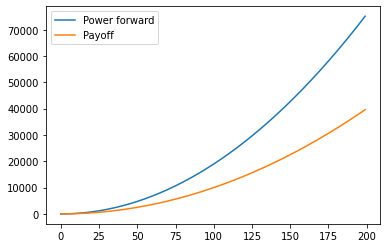

In [ ]:
# Compare power forward price to underlying price
maxStr = 200
plt.plot(np.arange(0,maxStr), [fwdPr(x) for x in np.arange(0,maxStr)])
plt.plot(np.arange(0,maxStr), [x**2 for x in np.arange(0,maxStr)])
plt.legend(['Power forward','Payoff'])

## Appendix: expected value of powers of the lognormal

To get to the pricing result for power forwards we need a result concerning the expected value of powers of a log-normal random variable. This involves a couple of tricks.

### Functions and moments of rvs

$f(x)$ is a pdf and $g(x)$ is some continuous fn

$E(g(x)) = \int_{-\infty}^\infty g(x)f(x)dx$

$E(x) = \int_{-\infty}^\infty xf(x)dx$

$E(x^2) = \int_{-\infty}^\infty x^2 f(x)dx$

### Moment generating functions

A moment generating function for a random vairable $X$ is 

$M_X(t) = E(e^{tx})$

This is useful because if we know what it is we can figure out the moments $E(X^k)$

Note that the series expansion of $e^{tx}$ is


$e^{tx} = 1 + tX + \frac{t^2x^2}{2!} + \frac{t^3x^2}{3!} + \ldots$

Therefore 

$M_X(t) = E(e^{tx}) = 1 + tX + \frac{t^2 E(x^2)}{2!} + \frac{t^3E(x^3)}{3!} + \ldots$

Differentiating $n$ times wrt $t$ and evaluating at $t=0$ gives the $n$th moment $E(X^n)$

For example $n=2$

$\frac{ \partial M_X^2(t) }{\partial t^2} = E(x^2) + \frac{3*2*tE(x^2)}{3!} + \ldots = E(x^2)$

### Moments of the log normal

A log normal $x$ has a distribution 

$f(x) = \frac{1}{\sqrt{2 \pi} \sigma} \frac{e^{-(\ln x-\mu)^2 / 2\sigma^2}}{x}$

The moments $E(x^k)$ are

$E(x^k) = \int_0^\infty x^k f(x) dx $

$ = \int_0^\infty x^k \frac{1}{\sqrt{2 \pi} \sigma} \frac{e^{-(\ln(x)-\mu)^2 / 2\sigma^2}}{x} dx $ 

$ = \int_0^\infty x^{k-1} \frac{1}{\sqrt{2 \pi} \sigma} e^{-(\ln(x)-\mu)^2 / 2\sigma^2} dx $ 

Change of variable

$y = \ln x; x = e^y, dx = e^y dy$


$ = \int_{-\infty}^\infty e^{(k-1)y} \frac{1}{\sqrt{2 \pi} \sigma} e^{-(y-\mu)^2 / 2\sigma^2} e^y dy $ 

The middle bit is just a normal distibution for $y$ so the whole thing is

$E(e^{ky})$

for a normally distributed $y$


The mgf of the normal distribution is 

$M_y(t) = E(e^{ty})= e^{\mu t + \frac{1}{2}\sigma^2 t^2}$


So the moments of the lognormal are just the mgf of the normal.


